In [ ]:
! git lfs install

Git LFS initialized.


In [ ]:
! git clone https://www.modelscope.cn/datasets/lzhmark/TUH_EEG_Artifact_Corpus.git

Cloning into 'TUH_EEG_Artifact_Corpus'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 4.27 KiB | 485.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
! unzip /content/TUH_EEG_Artifact_Corpus/tuar.zip

Archive:  /content/TUH_EEG_Artifact_Corpus/tuar.zip
   creating: tuh_eeg_artifact/
  inflating: tuh_eeg_artifact/AAREADME.txt,v  
   creating: tuh_eeg_artifact/edf/
   creating: tuh_eeg_artifact/edf/03_tcp_ar_a/
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaatjz_s001_t000.csv  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaagxr_s017_t000.csv  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaadao_s001_t003.edf  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t001.edf  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t002.edf  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaadao_s001_t004.edf  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaatjz_s001_t000_seiz.csv  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t004.edf  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t002_seiz.csv  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t004_seiz.csv  
  inflating: tuh_eeg_artifact/edf/03_tcp_ar_a/aaaaabnn_s002_t00

In [ ]:
! pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Try using a different delimiter, such as tab ('\t')
data = pd.read_csv('/content/tuh_eeg_artifact/edf/01_tcp_ar/aaaaaaju_s007_t000.csv', delimiter=',',header=6)
data.head()

,channel,start_time,stop_time,label,confidence
0,FP1-F7,0.0178,1.4167,musc_elec,1.0
1,FP1-F7,46.0178,73.0006,eyem_musc,1.0
2,FP1-F7,88.0190,100.0047,eyem_musc,1.0
3,FP1-F7,125.0077,131.9905,eyem_musc,1.0
4,FP1-F7,142.0059,144.9876,eyem_musc,1.0


In [ ]:
for i in range(len(data['channel'])):
  data['channel'][i]='EEG'+' '+ data['channel'][i].split('-')[0]+'-REF'


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['channel'][i]='EEG'+' '+ data['channel'][i].split('-')[0]+'-REF'
<ipython-input-6-e944bdf061af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['channel'][i]='EEG'+' '+ data['channel'][i].split('-')[0]+'-REF'
<ipython-input-6-e944bdf061af>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are se

In [ ]:
data

,channel,start_time,stop_time,label,confidence
0,EEG FP1-REF,0.0178,1.4167,musc_elec,1.0
1,EEG FP1-REF,46.0178,73.0006,eyem_musc,1.0
2,EEG FP1-REF,88.0190,100.0047,eyem_musc,1.0
3,EEG FP1-REF,125.0077,131.9905,eyem_musc,1.0
4,EEG FP1-REF,142.0059,144.9876,eyem_musc,1.0
...,...,...,...,...,...
593,EEG P4-REF,929.0711,973.1020,elec,1.0
594,EEG P4-REF,994.4404,994.7250,elec,1.0
595,EEG P4-REF,1002.6680,1002.8933,elec,1.0
596,EEG P4-REF,1077.3977,1077.6052,elec,1.0


In [ ]:
data.index=data['channel']

In [ ]:
data_ch=data.loc['EEG FP1-REF']

In [ ]:
data_ch

,channel,start_time,stop_time,label,confidence
channel,,,,,
EEG FP1-REF,EEG FP1-REF,0.0178,1.4167,musc_elec,1.0
EEG FP1-REF,EEG FP1-REF,46.0178,73.0006,eyem_musc,1.0
EEG FP1-REF,EEG FP1-REF,88.0190,100.0047,eyem_musc,1.0
EEG FP1-REF,EEG FP1-REF,125.0077,131.9905,eyem_musc,1.0
EEG FP1-REF,EEG FP1-REF,142.0059,144.9876,eyem_musc,1.0
...,...,...,...,...,...
EEG FP1-REF,EEG FP1-REF,1090.5056,1091.5311,eyem,1.0
EEG FP1-REF,EEG FP1-REF,1095.1233,1099.8536,eyem,1.0
EEG FP1-REF,EEG FP1-REF,1103.0071,1129.0178,eyem_musc,1.0


In [ ]:
import mne

file_path = "/content/tuh_eeg_artifact/edf/01_tcp_ar/aaaaaaju_s005_t000.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Print available channel names
print(raw.ch_names)

# Select data for an existing channel from the list above

channel_name = 'EEG FP1-REF'
data, times = raw[channel_name]
print(f"Data for {channel_name}:")
print(data[0]) # First 10 samples


Extracting EDF parameters from /content/tuh_eeg_artifact/edf/01_tcp_ar/aaaaaaju_s005_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360499  =      0.000 ...  1441.996 secs...
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']
Data for EEG FP1-REF:
[4.80010961e-03 4.79370092e-03 4.80636571e-03 ... 3.50000000e-09
 3.50000000e-09 3.50000000e-09]


In [ ]:
times

array([0.000000e+00, 4.000000e-03, 8.000000e-03, ..., 1.441988e+03,
       1.441992e+03, 1.441996e+03])

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew

# Initialize lists to store features
means = []
std_devs = []
kurtoses = []
skewnesses = []
medians = []
max_vals = []
min_vals = []
ranges = []
labels = []

# Iterate through each segment in data_ch
for i in range(data_ch.shape[0]):
    # Define the range
    lower_bound = data_ch['start_time'].iloc[i]
    upper_bound = data_ch['stop_time'].iloc[i]

    # Get indices where the values fall within the range
    indices = np.where((times >= lower_bound) & (times <= upper_bound))[0]
    selected_data = data[0, indices]

    # Calculate features
    means.append(np.mean(selected_data))
    std_devs.append(np.std(selected_data))
    kurtoses.append(kurtosis(selected_data))
    skewnesses.append(skew(selected_data))
    medians.append(np.median(selected_data))
    max_vals.append(np.max(selected_data))
    min_vals.append(np.min(selected_data))
    ranges.append(np.max(selected_data) - np.min(selected_data))

    # Add the label
    labels.append(data_ch['label'].iloc[i])

# Create a DataFrame with the calculated features
features_df = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': std_devs,
    'Kurtosis': kurtoses,
    'Skewness': skewnesses,
    'Median': medians,
    'Max': max_vals,
    'Min': min_vals,
    'Range': ranges,
    'Label': labels
})

# Display the resulting DataFrame
print(features_df)




             Mean  Standard Deviation  Kurtosis  Skewness        Median  \
0   -2.215987e-03            0.002137  0.252485  0.843073 -3.555292e-03   
1    2.678807e-06            0.000017  0.044181  0.312723  9.190266e-07   
2    4.895473e-06            0.000017  2.524958 -0.694968  5.191484e-06   
3   -9.868999e-06            0.000016  0.376903  0.815388 -1.372940e-05   
4    5.034743e-05            0.000008 -0.890182 -0.103179  5.127299e-05   
..            ...                 ...       ...       ...           ...   
111  5.784550e-06            0.000005  0.756320 -0.821721  6.412186e-06   
112 -1.362067e-05            0.000007  0.387601  0.470042 -1.433975e-05   
113  9.155539e-07            0.000025 -0.532044 -0.612531  4.123370e-06   
114  1.741830e-06            0.000024  0.599871  0.948724 -4.726721e-06   
115 -4.664761e-06            0.000018  0.316730 -0.165055 -4.421545e-06   

          Max       Min     Range      Label  
0    0.004984 -0.004218  0.009202  musc_elec  
1    

In [ ]:
features_df = pd.concat([features_df, features_df])

In [ ]:
features_df = pd.concat([features_df, features_df])

In [ ]:
# prompt: train test split

from sklearn.model_selection import train_test_split

# Assuming 'features_df' is your DataFrame with features and labels
X = features_df.drop('Label', axis=1)  # Features
y = features_df['Label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (371, 8)
y_train shape: (371,)
X_test shape: (93, 8)
y_test shape: (93,)


In [ ]:
# prompt: standardize zation and label binarization

from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the training labels
y_train_bin = lb.fit_transform(y_train)

# Transform the testing labels using the same binarizer
y_test_bin = lb.transform(y_test)

# Print the shapes of the transformed datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_bin shape:", y_train_bin.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test_bin shape:", y_test_bin.shape)

X_train_scaled shape: (371, 8)
y_train_bin shape: (371, 6)
X_test_scaled shape: (93, 8)
y_test_bin shape: (93, 6)


In [ ]:
# prompt: ensemble of svm , rf and navies

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Initialize the individual classifiers
svm_clf = SVC(probability=True)  # probability=True is required for VotingClassifier with soft voting
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()

# Create the ensemble classifier using VotingClassifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf), ('nb', nb_clf)], voting='soft')

# Train the ensemble classifier
ensemble_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ensemble_clf.predict(X_test_scaled)

# Evaluate the ensemble classifier (example using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")

Ensemble Accuracy: 0.967741935483871


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Ensemble Precision: {precision}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Ensemble Recall: {recall}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Ensemble F1 Score: {f1}")

Ensemble Precision: 0.9700460829493088
Ensemble Recall: 0.967741935483871
Ensemble F1 Score: 0.9671903896826567


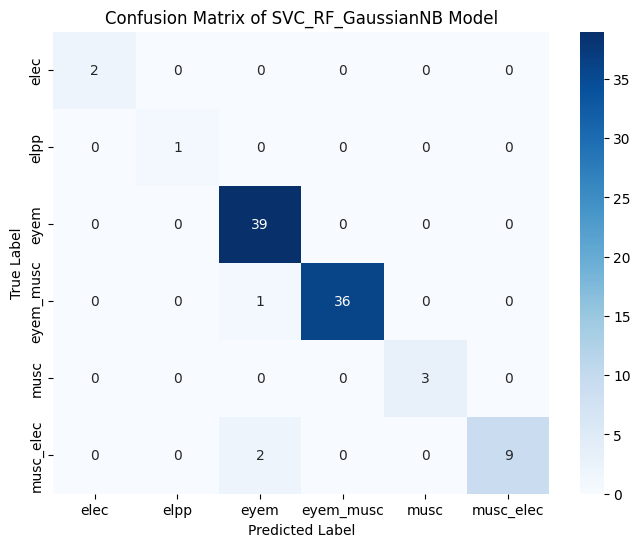

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from previous code
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of SVC_RF_GaussianNB Model")
plt.show()

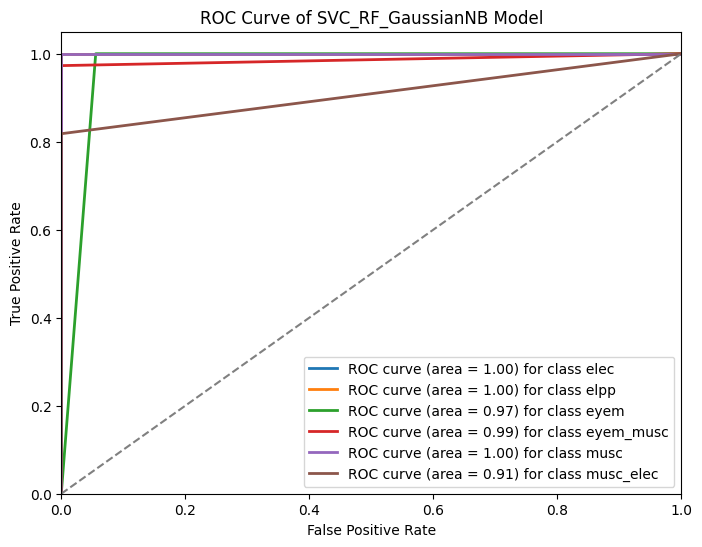

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=lb.classes_)
y_pred_bin = label_binarize(y_pred, classes=lb.classes_)
# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVC_RF_GaussianNB Model')
plt.legend(loc="lower right")
plt.show()

# **CNN, LSTM, and a Fully Connected Neural Network (FCNN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

# Reshape input for CNN and LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)),
    LSTM(50),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
lstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# FCNN Model
fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train_enc.shape[1], activation='softmax')
])
fcnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
cnn_model.fit(X_train_reshaped, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_enc))
lstm_model.fit(X_train_reshaped, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_enc))
fcnn_model.fit(X_train_scaled, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_enc))

# Evaluate models
cnn_acc = cnn_model.evaluate(X_test_reshaped, y_test_enc, verbose=0)[1]
lstm_acc = lstm_model.evaluate(X_test_reshaped, y_test_enc, verbose=0)[1]
fcnn_acc = fcnn_model.evaluate(X_test_scaled, y_test_enc, verbose=0)[1]

print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"FCNN Accuracy: {fcnn_acc:.4f}")

# Ensemble (Average Predictions)
import numpy as np

cnn_preds = cnn_model.predict(X_test_reshaped)
lstm_preds = lstm_model.predict(X_test_reshaped)
fcnn_preds = fcnn_model.predict(X_test_scaled)

ensemble_preds = (cnn_preds + lstm_preds + fcnn_preds) / 3
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
y_test_labels = np.argmax(y_test_enc, axis=1)

# Evaluate ensemble
from sklearn.metrics import accuracy_score, classification_report
ensemble_acc = accuracy_score(y_test_labels, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")
print(classification_report(y_test_labels, y_pred_ensemble))
ensemble_pre=precision_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Precision: {ensemble_pre}")
ensemble_recall=recall_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Recall: {ensemble_recall}")
ensemble_f1=f1_score(y_test_labels, y_pred_ensemble,average='weighted')
print(f"Ensemble F1 Score: {ensemble_f1}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.2418 - loss: 1.7771 - val_accuracy: 0.5054 - val_loss: 1.5753
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4743 - loss: 1.5540 - val_accuracy: 0.5054 - val_loss: 1.3791
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5155 - loss: 1.3411 - val_accuracy: 0.4839 - val_loss: 1.1810
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4896 - loss: 1.1873 - val_accuracy: 0.4839 - val_loss: 1.0518
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4791 - loss: 1.0811 - val_accuracy: 0.4839 - val_loss: 1.0003
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5033 - loss: 1.0399 - val_accuracy: 0.5054 - val_loss: 0.9871
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5147 - loss: 0.9948 - val_accuracy: 0.5054 - val_loss: 0.9792
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4756 - loss: 1.0345 - val_accuracy: 0.5054 - v

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

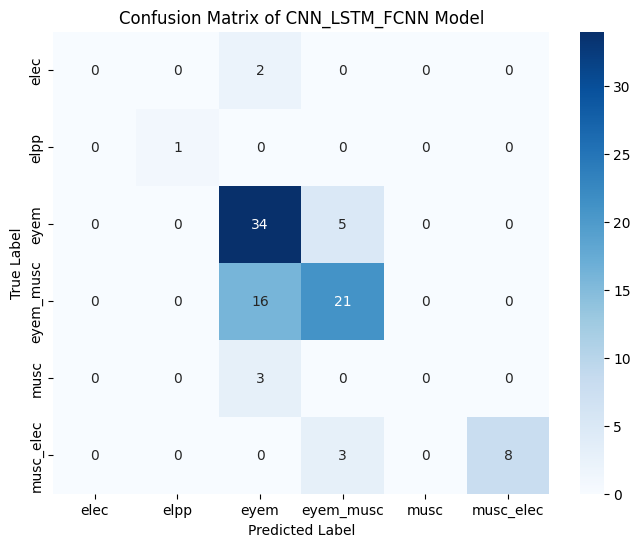

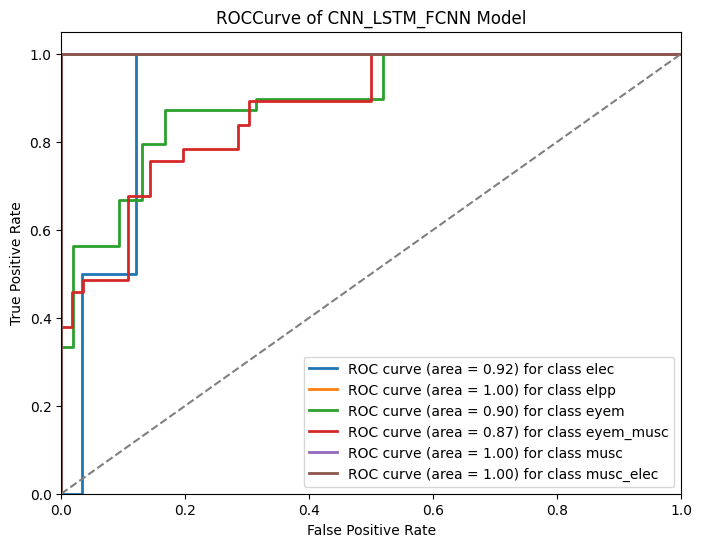

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of CNN_LSTM_FCNN Model")
plt.show()

# ROC Curve
y_test_bin = to_categorical(y_test_labels)
y_pred_bin = to_categorical(y_pred_ensemble)
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ensemble_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROCCurve of CNN_LSTM_FCNN Model')
plt.legend(loc="lower right")
plt.show()

# **GRU_DNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

# GRU Model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    GRU(64),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
gru_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Deep Neural Network (DNN) Model
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
dnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
gru_model.fit(X_train_scaled, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_enc))
dnn_model.fit(X_train_scaled, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_enc))

# Evaluate models
gru_acc = gru_model.evaluate(X_test_scaled, y_test_enc, verbose=0)[1]
dnn_acc = dnn_model.evaluate(X_test_scaled, y_test_enc, verbose=0)[1]

print(f"GRU Accuracy: {gru_acc:.4f}")
print(f"DNN Accuracy: {dnn_acc:.4f}")

# Ensemble (Average Predictions)
import numpy as np

gru_preds = gru_model.predict(X_test_scaled)
dnn_preds = dnn_model.predict(X_test_scaled)

ensemble_preds = (gru_preds + dnn_preds) / 2
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
y_test_labels = np.argmax(y_test_enc, axis=1)

# Evaluate ensemble
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
ensemble_acc = accuracy_score(y_test_labels, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")
print(classification_report(y_test_labels, y_pred_ensemble))
ensemble_pre=precision_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Precision: {ensemble_pre}")
ensemble_recall=recall_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Recall: {ensemble_recall}")
ensemble_f1=f1_score(y_test_labels, y_pred_ensemble,average='weighted')
print(f"Ensemble F1 Score: {ensemble_f1}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.2707 - loss: 1.7023 - val_accuracy: 0.5484 - val_loss: 1.6975
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4317 - loss: 1.2991 - val_accuracy: 0.4731 - val_loss: 1.5909
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4403 - loss: 1.2597 - val_accuracy: 0.4516 - val_loss: 1.4889
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4973 - loss: 1.1921 - val_accuracy: 0.4731 - val_loss: 1.4119
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4705 - loss: 1.1413 - val_accuracy: 0.4731 - val_loss: 1.3039
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4479 - loss: 1.1541 - val_accuracy: 0.4516 - val_loss: 1.2544
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5220 - loss: 1.0213 - val_accuracy: 0.4731 - val_loss: 1.2110
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5331 - loss: 1.0887 - val_accuracy: 0.4731 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

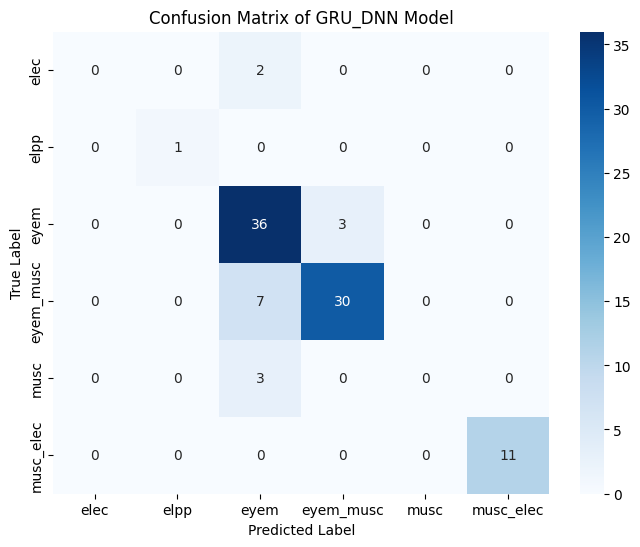

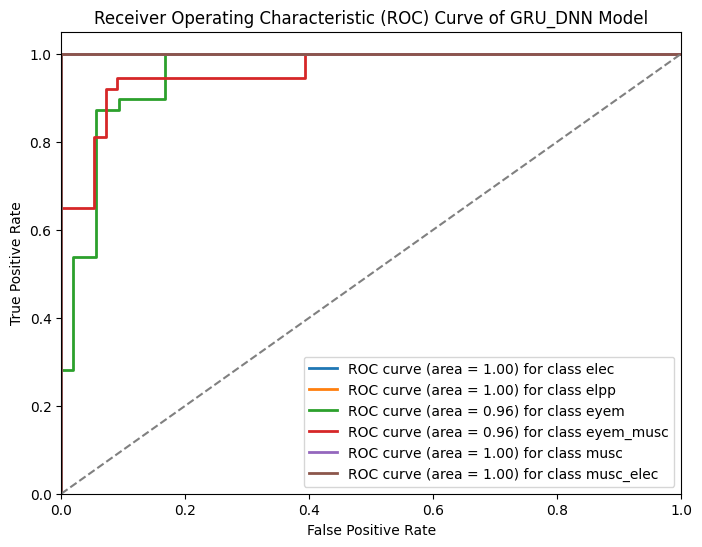

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of GRU_DNN Model")
plt.show()

# ROC Curve
y_test_bin = to_categorical(y_test_labels)
y_pred_bin = to_categorical(y_pred_ensemble)
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ensemble_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of GRU_DNN Model')
plt.legend(loc="lower right")
plt.show()

# **LSTM_DNN Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.2168 - loss: 1.7215 - val_accuracy: 0.4731 - val_loss: 1.7220
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4592 - loss: 1.3473 - val_accuracy: 0.5161 - val_loss: 1.6304
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4071 - loss: 1.3104 - val_accuracy: 0.4301 - val_loss: 1.5451
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4301 - loss: 1.2023 - val_accuracy: 0.4731 - val_loss: 1.4601
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5117 - loss: 1.1464 - val_accuracy: 0.4731 - val_loss: 1.3899
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5045 - loss: 1.1697 - val_accuracy: 0.4731 - val_loss: 1.3445
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4493 - loss: 1.1451 - val_accuracy: 0.4731 - val_loss: 1.2983
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5514 - loss: 1.0395 - val_accuracy: 0.4731 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

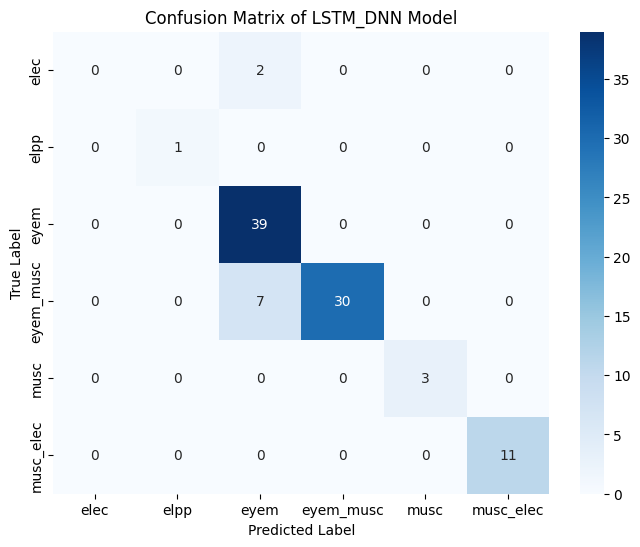

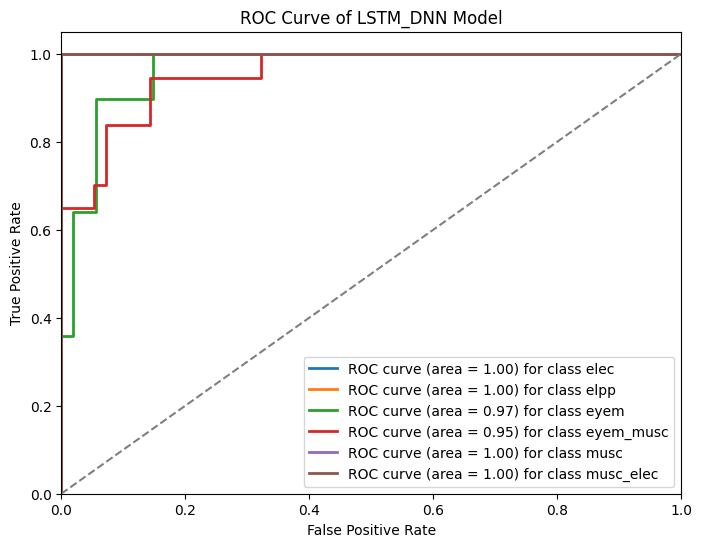

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    LSTM(64),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
lstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Deep Neural Network (DNN) Model
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])
dnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
lstm_model.fit(X_train_scaled, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_enc))
dnn_model.fit(X_train_scaled, y_train_enc, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_enc))

# Evaluate models
lstm_acc = lstm_model.evaluate(X_test_scaled, y_test_enc, verbose=0)[1]
dnn_acc = dnn_model.evaluate(X_test_scaled, y_test_enc, verbose=0)[1]

print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"DNN Accuracy: {dnn_acc:.4f}")

# Ensemble (Average Predictions)
lstm_preds = lstm_model.predict(X_test_scaled)
dnn_preds = dnn_model.predict(X_test_scaled)
ensemble_preds = (lstm_preds + dnn_preds) / 2
y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
y_test_labels = np.argmax(y_test_enc, axis=1)

# Evaluate ensemble
ensemble_acc = accuracy_score(y_test_labels, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")
print(classification_report(y_test_labels, y_pred_ensemble))
ensemble_pre=precision_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Precision: {ensemble_pre}")
ensemble_recall=recall_score(y_test_labels, y_pred_ensemble, average='weighted')
print(f"Ensemble Recall: {ensemble_recall}")
ensemble_f1=f1_score(y_test_labels, y_pred_ensemble,average='weighted')
print(f"Ensemble F1 Score: {ensemble_f1}")

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of LSTM_DNN Model")
plt.show()

# ROC Curve
y_test_bin = to_categorical(y_test_labels)
y_pred_bin = to_categorical(y_pred_ensemble)
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ensemble_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {le.classes_[i]}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LSTM_DNN Model')
plt.legend(loc="lower right")
plt.show()
